## 타자 통산 기록 시각화 코드

In [24]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline
# 사용자 운영체제 확인
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [4]:
df_hit = pd.read_csv('DB_hit.csv', index_col=False)
df_hit

,idx,code,year,date,result,h_order,position,startup,pa,run,...,sh,sf,avg,obp,slg,ops,pit,avli,re24,wpa
0,0,78168,2018,03-24,W 6:3,1,2B,1,5,0,...,0,0,0.200,0.200,0.200,0.400,24,0.73,-0.78,-0.032
1,1,78168,2018,03-25,L 1:4,1,2B,1,4,0,...,0,0,0.111,0.111,0.111,0.222,13,1.00,-1.27,-0.127
2,2,78168,2018,03-27,W 5:4,3,2B,1,5,2,...,0,0,0.286,0.286,0.357,0.643,21,1.51,0.90,0.118
3,3,78168,2018,03-28,L 3:9,3,2B,1,3,1,...,0,0,0.235,0.278,0.294,0.572,13,1.11,-0.91,-0.073
4,4,78168,2018,03-29,W 9:4,3,2B,1,3,1,...,0,0,0.250,0.348,0.300,0.648,16,0.73,0.79,0.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99181,99181,65132,2023,06-28,L 6:9,6,C,0,0,0,...,0,0,0.238,0.385,0.310,0.694,0,0.00,0.00,0.000
99182,99182,65132,2023,06-30,D :,8,PH,0,2,0,...,0,0,0.227,0.370,0.295,0.666,8,0.17,-0.72,-0.009
99183,99183,65132,2023,07-01,D :,4,C,0,1,0,...,0,0,0.244,0.382,0.311,0.693,4,0.01,0.22,0.000
99184,99184,65132,2023,07-02,D :,5,DH,1,3,0,...,0,0,0.229,0.362,0.292,0.654,12,1.59,-1.45,-0.119


In [5]:
# 6년치(모든 데이터) 각 선수들의 평균 지표 합산
hit_drop = df_hit.drop(['idx', 'date', 'result', 'h_order', 'position',
       'startup','run', 'rbi','sb_s', 'sb_f', 'avg', 'obp', 'slg', 'ops', 'pit', 'avli'], axis=1)
hit_drop['타석'] = hit_drop['pa'] + hit_drop['bb'] + hit_drop['hbp'] + hit_drop['ibb'] + hit_drop['sh'] + hit_drop['sf']
hit_drop

,code,year,pa,hit,second,third,homerun,luta,bb,hbp,ibb,k,dp,sh,sf,re24,wpa,타석
0,78168,2018,5,1,0,0,0,1,0,0,0,1,0,0,0,-0.78,-0.032,5
1,78168,2018,4,0,0,0,0,0,0,0,0,1,0,0,0,-1.27,-0.127,4
2,78168,2018,5,3,1,0,0,4,0,0,0,0,0,0,0,0.90,0.118,5
3,78168,2018,3,0,0,0,0,0,1,0,0,1,0,0,0,-0.91,-0.073,4
4,78168,2018,3,1,0,0,0,1,2,0,0,0,0,0,0,0.79,0.016,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99181,65132,2023,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.000,0
99182,65132,2023,2,0,0,0,0,0,0,0,0,0,0,0,0,-0.72,-0.009,2
99183,65132,2023,1,1,0,0,0,1,0,0,0,0,0,0,0,0.22,0.000,1
99184,65132,2023,3,0,0,0,0,0,0,0,0,2,0,0,0,-1.45,-0.119,3


In [6]:
# 시즌 별 각 선수들의 타석 수

hit_code_year = hit_drop.groupby(['code', 'year']).sum()
hit_code_year

pa  hit  second  third  homerun  luta  bb  hbp  ibb   k  dp  sh  \
code  year                                                                     
50007 2023    5    1       0      0        0     1   0    0    0   4   0   0   
50054 2020   69   14       3      0        0    17   7    1    0  15   0   0   
      2021   42   12       1      0        0    13   3    2    0   9   0   0   
50066 2020   30    6       2      0        1    11   2    0    0  11   1   0   
      2023   64   15       5      0        1    23   3    0    0  13   3   0   
...         ...  ...     ...    ...      ...   ...  ..  ...  ...  ..  ..  ..   
79705 2018   95   24       5      0        4    41  11    3    0  27   4   3   
      2019  104   24       4      0        3    37  11    0    0  24   1   1   
      2020   18    3       1      0        0     4   3    1    0   6   2   2   
99606 2018  184   54      11      0        4    77  16    5    1  49   5   0   
99810 2018  283   90      17      1        3   118  25    0    1  35   3   1   

            sf   re24    wpa   타석  
code  year                         
50007 2023   0  -1.70 -0.041    5  
50054 2020   0  -6.66 -0.412   77  
      2021   0  -0.54  0.253   47  
50066 2020   0  -1.94  0.019   32  
      2023   0  -6.89 -1.026   67  
...         ..    ...    ...  ...  
79705 2018   0   4.00  0.074  112  
      2019   1  -3.04  0.163  117  
      2020   1  -4.08 -0.222   25  
99606 2018   1  -1.70 -0.331  207  
99810 2018   3  10.24  1.457  313  

[1508 rows x 16 columns]

### 시즌 별 / 통산 기록 데이터 프레임

In [27]:
# 93타석 이상인 데이터만 추출

hit_drop_93 = hit_code_year[hit_code_year['타석'] >= 93]
hit_drop_93.reset_index(inplace=True)
hit_drop_93

,code,year,pa,hit,second,third,homerun,luta,bb,hbp,ibb,k,dp,sh,sf,re24,wpa,타석
0,50165,2020,442,123,17,2,40,264,57,5,5,142,7,0,4,22.52,2.492,513
1,50165,2021,185,45,7,1,8,78,18,2,0,43,2,0,0,-2.91,-0.153,205
2,50202,2022,239,71,7,2,0,82,26,1,0,40,6,1,0,-2.02,-0.469,267
3,50202,2023,135,38,3,1,2,49,12,0,0,20,2,1,2,-0.49,0.437,150
4,50293,2022,82,20,4,0,3,33,11,0,0,23,2,1,0,1.81,0.381,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,79608,2023,242,67,9,1,2,84,26,5,2,28,8,5,3,4.67,1.360,283
867,79705,2018,95,24,5,0,4,41,11,3,0,27,4,3,0,4.00,0.074,112
868,79705,2019,104,24,4,0,3,37,11,0,0,24,1,1,1,-3.04,0.163,117
869,99606,2018,184,54,11,0,4,77,16,5,1,49,5,0,1,-1.70,-0.331,207


In [28]:
# 선수 코드의 각 시즌 별 6개지표 계산

# 타율(avg)
hit_avg = hit_drop_93['hit'] / hit_drop_93['pa']
hit_drop_93['타율'] = round(hit_avg, 3)

# 출루율(obp) / 출루율 = (안타 + 볼넷 + 사구) ÷ (타수 + 볼넷 + 사구 + 희생플라이)
hit_obp = (hit_drop_93['hit']+ hit_drop_93['bb'] + hit_drop_93['hbp'] + hit_drop_93['ibb']) / (hit_drop_93['pa'] + hit_drop_93['bb'] + hit_drop_93['hbp'] + hit_drop_93['ibb'] + hit_drop_93['sf'])
hit_drop_93['출루율'] = round(hit_obp, 3)

# 장타율(slg)
hit_slg = (hit_drop_93['hit'] + hit_drop_93['second'] + 2*hit_drop_93['third'] + 3*hit_drop_93['homerun']) / hit_drop_93['pa']
hit_drop_93['장타율'] = round(hit_slg, 3)

# 볼삼비(BB/K) - 볼넷이 0인 경우 볼삼비 infinity가 발생 -> 처리 필요
hit_bbk = hit_drop_93['bb'] / hit_drop_93['k']
hit_drop_93['BB/K'] = round(hit_bbk, 3)
hit_drop_93.loc[(hit_drop_93['bb']>=1) & (hit_drop_93['k']==0), 'BB/K'] = 1

# 컬럼명 대문자로 변경  -> 시각화 그래프에서 보기 쉽게 한글로 표현하는 것이 좋다고 판단.
hit_drop_93['RE24'] = round(hit_drop_93['re24'], 3) 
hit_drop_93['WPA'] = round(hit_drop_93['wpa'], 3)
hit_drop_93

,code,year,pa,hit,second,third,homerun,luta,bb,hbp,...,sf,re24,wpa,타석,타율,출루율,장타율,BB/K,RE24,WPA
0,50165,2020,442,123,17,2,40,264,57,5,...,4,22.52,2.492,513,0.278,0.370,0.597,0.401,22.52,2.492
1,50165,2021,185,45,7,1,8,78,18,2,...,0,-2.91,-0.153,205,0.243,0.317,0.422,0.419,-2.91,-0.153
2,50202,2022,239,71,7,2,0,82,26,1,...,0,-2.02,-0.469,267,0.297,0.368,0.343,0.650,-2.02,-0.469
3,50202,2023,135,38,3,1,2,49,12,0,...,2,-0.49,0.437,150,0.281,0.336,0.363,0.600,-0.49,0.437
4,50293,2022,82,20,4,0,3,33,11,0,...,0,1.81,0.381,94,0.244,0.333,0.402,0.478,1.81,0.381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,79608,2023,242,67,9,1,2,84,26,5,...,3,4.67,1.360,283,0.277,0.360,0.347,0.929,4.67,1.360
867,79705,2018,95,24,5,0,4,41,11,3,...,0,4.00,0.074,112,0.253,0.349,0.432,0.407,4.00,0.074
868,79705,2019,104,24,4,0,3,37,11,0,...,1,-3.04,0.163,117,0.231,0.302,0.356,0.458,-3.04,0.163
869,99606,2018,184,54,11,0,4,77,16,5,...,1,-1.70,-0.331,207,0.293,0.367,0.418,0.327,-1.70,-0.331


### 육각형 그래프를 그릴 때 선수들의 가치(배점)을 매기기 위해 사용하려는 6지표(타자 - 타율, 출루율, 장타율, WPS, RE24 / 투수 - ERA, WHIP, K/IP, K/BB, RE24, WPS)들의 정규분포 확인

In [29]:
hit_drop_93.columns

Index(['code', 'year', 'pa', 'hit', 'second', 'third', 'homerun', 'luta', 'bb',
       'hbp', 'ibb', 'k', 'dp', 'sh', 'sf', 're24', 'wpa', '타석', '타율', '출루율',
       '장타율', 'BB/K', 'RE24', 'WPA'],
      dtype='object')

In [33]:
# 2018

hit_93_2018 = hit_drop_93[hit_drop_93['year'] == 2018]
hit_93_2018['타율'].mean()

0.27966206896551726

In [34]:
hit_93_2018['타율'].std()

0.039248712061256644

In [50]:
# 2018년도 시즌 기록의 선수 코드 지표 합산

code_sum_2018 = hit_93_2018.groupby('code').sum()
code_sum_2018.reset_index(inplace=True)
code_sum_2018

,code,year,pa,hit,second,third,homerun,luta,bb,hbp,...,sf,re24,wpa,타석,타율,출루율,장타율,BB/K,RE24,WPA
0,60343,2018,162,35,4,0,8,63,8,3,...,0,-6.68,-0.693,174,0.216,0.266,0.389,0.163,-6.68,-0.693
1,60523,2018,174,53,10,1,7,86,16,1,...,3,3.65,-0.308,195,0.305,0.364,0.494,0.410,3.65,-0.308
2,60558,2018,342,87,17,2,12,144,24,4,...,1,-7.96,-0.028,374,0.254,0.310,0.421,0.261,-7.96,-0.028
3,60566,2018,187,47,2,0,0,49,8,2,...,0,-19.94,-1.228,204,0.251,0.289,0.262,0.533,-19.94,-1.228
4,61102,2018,425,126,33,0,19,216,28,9,...,1,6.49,-0.623,466,0.296,0.353,0.508,0.350,6.49,-0.623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,79465,2018,147,36,6,0,0,42,16,3,...,0,-7.41,-0.354,170,0.245,0.339,0.286,0.457,-7.41,-0.354
141,79608,2018,498,170,38,1,23,279,36,10,...,9,44.85,4.044,554,0.341,0.392,0.560,0.632,44.85,4.044
142,79705,2018,95,24,5,0,4,41,11,3,...,0,4.00,0.074,112,0.253,0.349,0.432,0.407,4.00,0.074
143,99606,2018,184,54,11,0,4,77,16,5,...,1,-1.70,-0.331,207,0.293,0.367,0.418,0.327,-1.70,-0.331


In [46]:
code_sum_2018.dtypes

code         int64
year         int64
pa           int64
hit          int64
second       int64
third        int64
homerun      int64
luta         int64
bb           int64
hbp          int64
ibb          int64
k            int64
dp           int64
sh           int64
sf           int64
re24       float64
wpa        float64
타석           int64
타율         float64
출루율        float64
장타율        float64
BB/K       float64
RE24       float64
WPA        float64
dtype: object

In [68]:
code_sum_2018.quantile() # default 50%

code       71184.000
year        2018.000
pa           336.000
hit           92.000
second        16.000
third          1.000
homerun        8.000
luta         144.000
bb            28.000
hbp            4.000
ibb            0.000
k             61.000
dp             7.000
sh             2.000
sf             2.000
re24           4.510
wpa            0.618
타석           386.000
타율             0.279
출루율            0.352
장타율            0.432
BB/K           0.424
RE24           4.510
WPA            0.618
Name: 0.5, dtype: float64

In [71]:
# 각 시즌별 지표들의 정규 분포를 확인하는 Q-Q plot 그리는 함수 생성

def Qplot(stat_name, year):
    
    # 선수 코드의 각 시즌 별 6개지표 계산
    # 타율(avg)
    hit_avg = hit_drop_93['hit'] / hit_drop_93['pa']
    hit_drop_93['타율'] = round(hit_avg, 3)

    # 출루율(obp) / 출루율 = (안타 + 볼넷 + 사구) ÷ (타수 + 볼넷 + 사구 + 희생플라이)
    hit_obp = (hit_drop_93['hit']+ hit_drop_93['bb'] + hit_drop_93['hbp'] + hit_drop_93['ibb']) / (hit_drop_93['pa'] + hit_drop_93['bb'] + hit_drop_93['hbp'] + hit_drop_93['ibb'] + hit_drop_93['sf'])
    hit_drop_93['출루율'] = round(hit_obp, 3)

    # 장타율(slg)
    hit_slg = (hit_drop_93['hit'] + hit_drop_93['second'] + 2*hit_drop_93['third'] + 3*hit_drop_93['homerun']) / hit_drop_93['pa']
    hit_drop_93['장타율'] = round(hit_slg, 3)

    # 볼삼비(BB/K) - 볼넷이 0인 경우 볼삼비 infinity가 발생 -> 처리 필요
    hit_bbk = hit_drop_93['bb'] / hit_drop_93['k']
    hit_drop_93['BB/K'] = round(hit_bbk, 3)
    hit_drop_93.loc[(hit_drop_93['bb']>=1) & (hit_drop_93['k']==0), 'BB/K'] = 1

    # 컬럼명 대문자로 변경  -> 시각화 그래프에서 보기 쉽게 한글로 표현하는 것이 좋다고 판단.
    hit_drop_93['RE24'] = round(hit_drop_93['re24'], 3) 
    hit_drop_93['WPA'] = round(hit_drop_93['wpa'], 3)
    
    # 해당년도 데이터프레임 추출
    hit_93_year = hit_drop_93[hit_drop_93['year'] == year]
    
    # 해당년도 시즌 기록의 선수 코드 지표 합산
    code_sum_year = hit_93_year.groupby('code').sum()
    code_sum_year.reset_index(inplace=True)
    
    # Q-Q plot
    fig, ax = plt.subplots(figsize=(8, 8))
    stats.probplot(code_sum_year[stat_name], dist='norm', plot=ax)
    plt.title(f"{year}년 {stat_name} Q-Q plot")
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')
    print(f"25%분위 수: {code_sum_year[stat_name].quantile([0.25])}")
    print(f"50%분위 수: {code_sum_year[stat_name].quantile([0.5])}")
    print(f"75%분위 수: {code_sum_year[stat_name].quantile([0.75])}")
    return plt.show(), plt.hist(code_sum_year[stat_name])

25%분위 수: 0.25    0.253
Name: 타율, dtype: float64
50%분위 수: 0.5    0.279
Name: 타율, dtype: float64
75%분위 수: 0.75    0.308
Name: 타율, dtype: float64


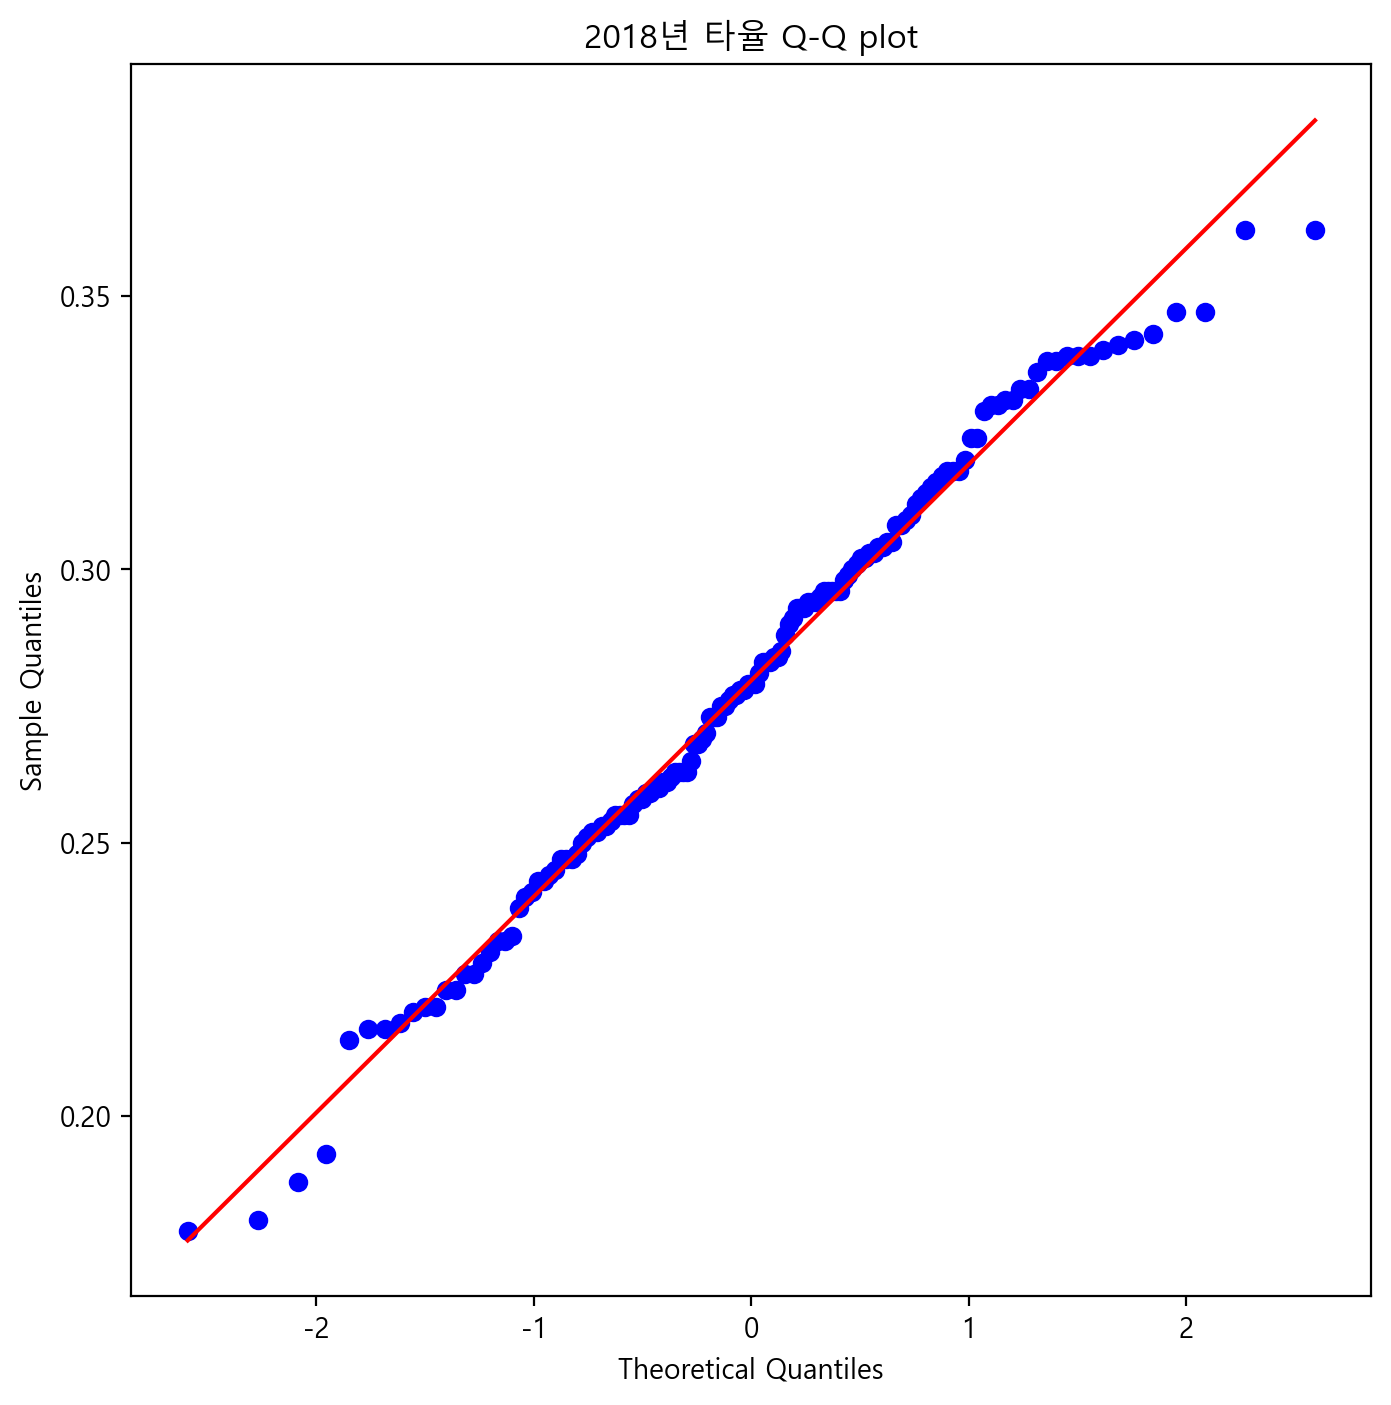

(None,
 (array([ 4.,  1., 15., 15., 26., 21., 26., 16., 17.,  4.]),
  array([0.179 , 0.1973, 0.2156, 0.2339, 0.2522, 0.2705, 0.2888, 0.3071,
         0.3254, 0.3437, 0.362 ]),
  <BarContainer object of 10 artists>))

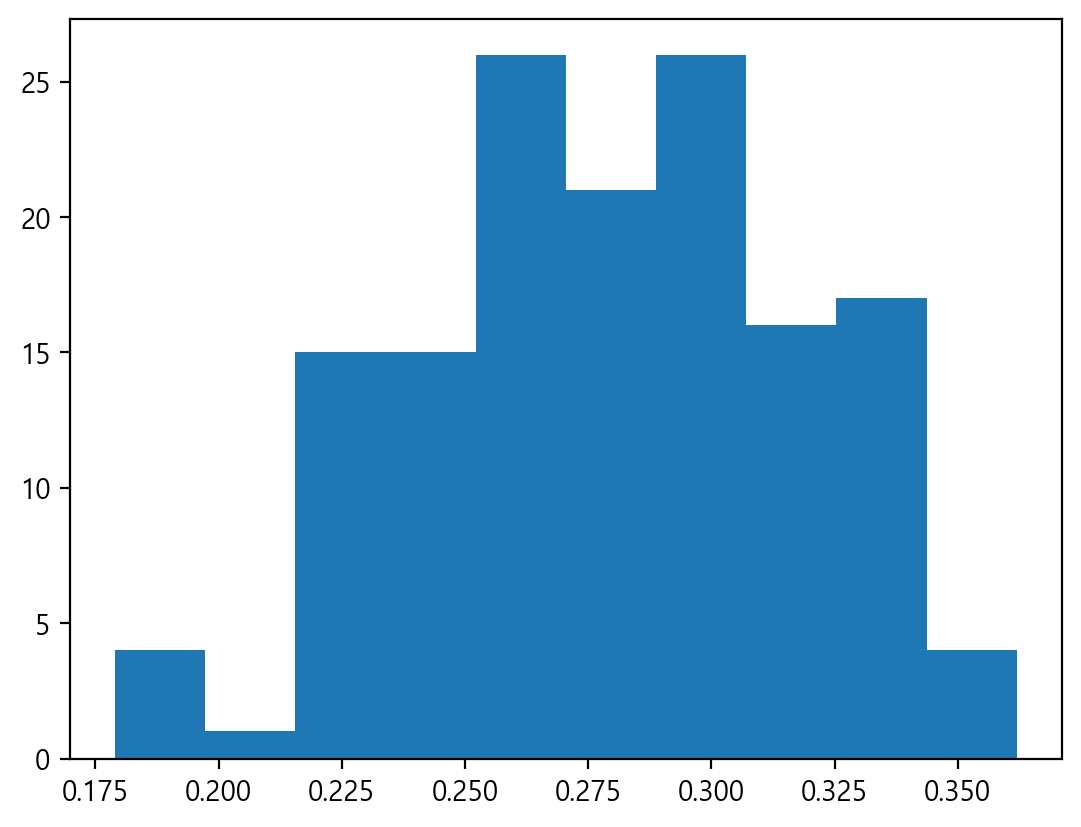

In [72]:
Qplot('타율', 2018)

### 타자 시즌 별 기록 Line_polar 함수 생성

In [ ]:
# 선수 별 시즌 기록을 시각화하는 함수 생성 코드

def extract_season_records(player_code, year):
    try:
        # 필요 없는 컬럼을 제거한 dataframe 
        hit_drop = df.drop(['idx', 'date', 'result', 'h_order', 'position',
               'startup','run', 'rbi','sb_s', 'sb_f', 'avg', 'obp', 'slg', 'ops', 'pit', 'avli'], axis=1)
        
        # def season_dataframe(hit_drop, year):
        hit_season = hit_drop[hit_drop['year'] == year]

        hit_drop_season = hit_season.drop(['year', 'dp', 'sh'], axis=1)
        hit_sum_season = hit_drop_season.groupby('code').sum()

        # 타율(avg)
        hit_avg = hit_sum_season['hit'] / hit_sum_season['pa']
        hit_sum_season['타율'] = round(hit_avg, 3)

        # 출루율(obp) / 출루율 = (안타 + 볼넷 + 사구) ÷ (타수 + 볼넷 + 사구 + 희생플라이)
        hit_obp = (hit_sum_season['hit']+ hit_sum_season['bb'] + hit_sum_season['hbp'] + hit_sum_season['ibb']) / (hit_sum_season['pa'] + hit_sum_season['bb'] + hit_sum_season['hbp'] + hit_sum_season['ibb'] + hit_sum_season['sf'])
        hit_sum_season['출루율'] = round(hit_obp, 3)

        # 장타율(slg)
        hit_slg = (hit_sum_season['hit'] + hit_sum_season['second'] + 2*hit_sum_season['third'] + 3*hit_sum_season['homerun']) / hit_sum_season['pa']
        hit_sum_season['장타율'] = round(hit_slg, 3)

        # 볼삼비(BB/K) - 볼넷이 0인 경우 볼삼비 infinity가 발생 -> 처리 필요
        hit_bbk = hit_sum_season['bb'] / hit_sum_season['k']
        hit_sum_season['BB/K'] = round(hit_bbk, 3)
        hit_sum_season.loc[(hit_sum_season['bb']>=1) & (hit_sum_season['k']==0), 'BB/K'] = 1
 
        # 컬럼명 대문자로 변경  -> 시각화 그래프에서 보기 쉽게 한글로 표현하는 것이 좋다고 판단.
        hit_sum_season['RE24'] = round(hit_sum_season['re24'], 3) 
        hit_sum_season['WPA'] = round(hit_sum_season['wpa'], 3) 

        df_season_hit = hit_sum_season.drop(['pa', 'hit', 'second', 'third', 'homerun', 'luta', 'bb', 'hbp', 'ibb',
           'k', 'sf', 're24', 'wpa'], axis=1)

        # 시각화위해 scaling
        scaler = MinMaxScaler()
        hit_scaled_season = pd.DataFrame(scaler.fit_transform(df_season_hit), columns=df_season_hit.columns, index=df_season_hit.index)*10
        hit_scaled_season.reset_index(inplace=True)
    
        # 시각화
        df_player = hit_scaled_season[hit_scaled_season['code'] == player_code]
        fig = px.line_polar(df_player, r = list(hit_scaled_season[hit_scaled_season['code'] == player_code][hit_scaled_season.columns.difference(['code'])].iloc[0]),
                           theta = hit_scaled_season.columns[1:], line_close=True, color_discrete_sequence=px.colors.sequential.Plasma_r,
                           template='plotly_dark', range_r = [0, 10.0], title=f"{year}시즌 {player_code}기록 ",
                           direction="counterclockwise", start_angle=90)
        fig.update_traces(fill='toself')

        return fig.show(), df_season_hit[df_season_hit.index == player_code]
    
    except IndexError:
        print(f"No data found for player {player_code}")

In [ ]:
extract_season_records(52605, 2023)  # 2022년 김도영 선수 확인 // 그래프 웹페이지에 표현할 때 그래프에 표현되는 숫자는 스케일링된 수치이므로 선수의 개인기록 수치가 아님

In [83]:
# 각 선수들의 지표 합산

hit_sum_code = hit_drop.groupby('code').sum()
hit_sum_code

,year,pa,hit,second,third,homerun,luta,bb,hbp,ibb,k,dp,sh,sf,re24,wpa,타석
code,,,,,,,,,,,,,,,,,
50007,4046,5,1,0,0,0,1,0,0,0,4,0,0,0,-1.70,-0.041,5
50054,216181,111,26,4,0,0,30,10,3,0,24,0,0,0,-7.20,-0.159,124
50066,117256,94,21,7,0,2,34,5,0,0,24,4,0,0,-8.83,-1.007,99
50150,139467,119,32,2,2,4,50,8,1,0,23,5,1,1,3.92,-0.109,130
50165,345471,627,168,24,3,48,342,75,7,5,185,9,0,4,19.61,2.339,718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79530,78720,58,10,2,1,0,14,3,0,0,20,4,2,1,-8.29,-0.805,64
79608,1371800,2428,738,150,8,62,1090,240,31,12,279,64,22,33,71.37,8.549,2766
79705,272518,217,51,10,0,7,82,25,4,0,57,7,6,2,-3.12,0.015,254


In [82]:
# 시즌별 93 타석 이하 데이터 drop

hit_drop_pa = hit_drop.drop(hit_drop.groupby(['code', 'year'][hit_drop[hit_drop['타석']] < 93]))
hit_drop_pa

KeyError: "None of [Int64Index([5, 4, 5, 4, 5, 6, 3, 6, 5, 2,\n            ...\n            1, 1, 1, 2, 1, 0, 2, 1, 3, 4],\n           dtype='int64', length=99186)] are in the [columns]"

### 타자 통산 기록 line_polar return하는 코드 생성

In [ ]:
def extract_total_records(player_code):
    try:
        # 필요 없는 컬럼 drop
        hit_drop = df_hit.drop(['idx', 'date', 'result', 'h_order', 'position',
       'startup','run', 'rbi','sb_s', 'sb_f', 'avg', 'obp', 'slg', 'ops', 'pit', 'avli'], axis=1)
        
        # code로 groupby
        hit_sum = hit_drop.groupby('code').sum()
        
        # 'bb' == 0 인 경우와 'k' == 0이 존재, 후에 볼삼비를 구할 때 infinity가 발생할 가능성 있음, 처리 필요
        hit_sum['bb'].replace(0, 1, inplace=True)
        his_sum['k'].replace(0, 1, inplace=True)
        
        # 타율(avg)
        hit_avg = hit_sum['hit'] / hit_sum['pa']
        hit_sum['타율'] = round(hit_avg, 3)

        # 출루율(obp) / 출루율 = (안타 + 볼넷 + 사구) ÷ (타수 + 볼넷 + 사구 + 희생플라이)
        hit_obp = (hit_sum['hit']+ hit_sum['bb'] + hit_sum['hbp'] + hit_sum['ibb']) / (hit_sum['pa'] + hit_sum['bb'] + hit_sum['hbp'] + hit_sum['ibb'] + hit_sum['sf'])
        hit_sum['출루율'] = round(hit_obp, 3)

        # 장타율(slg)
        hit_slg = (hit_sum['hit'] + hit_sum['second'] + 2*hit_sum['third'] + 3*hit_sum['homerun']) / hit_sum['pa']
        hit_sum['장타율'] = round(hit_slg, 3)

        # 볼삼비(BB/K) - 볼넷이 0인 경우 볼삼비 infinity가 발생 -> 처리 필요
        hit_bbk = hit_sum['bb'] / hit_sum['k']
        hit_sum['BB/K'] = round(hit_bbk, 3)
        hit_sum.loc[(hit_sum['bb']>=1) & (hit_sum['k']==0), 'BB/K'] = 1

        # 컬럼명 대문자로 변경
        hit_sum['RE24'] = round(hit_sum['re24'], 3) 
        hit_sum['WPA'] = round(hit_sum['wpa'], 3)
        
        # 필요한 6개 지표 추출위해 필요없는 컬럼 제거
        df_hit = hit_sum.drop(['year', 'pa', 'hit', 'second', 'third', 'homerun', 'luta', 'bb', 'hbp',
       'ibb', 'k', 'dp', 'sh', 'sf', 're24', 'wpa'], axis=1)
        
        # 
        scaler = MinMaxScaler()
        df_scaled = pd.DataFrame(scaler.fit_transform(df_hit), columns=df_hit.columns, index=df_hit.index)*10
        df_scaled.reset_index(inplace=True)

In [70]:
hit_sum_93['타율'].mean()

KeyError: '타율'

In [62]:
# ####
# code_list = hit_sum_93['code'].unique()

# df_recent_n_games = pd.DataFrame(columns = ['code','pa', 'hit'])


# for code in code_list:
#     code_data = df_hit[df_hit['code'] == code][-80:-70][['code', 'pa', 'hit']]
#     df_recent_n_games = pd.concat([code_data, df_recent_n_games])
    
# xx = df_recent_n_games.groupby('code').sum()


# xx['타율'] = xx['hit'] / xx['pa']
# xx['타율'].mean()

0.23971973689077447

In [44]:
# xx['타율'] = xx['hit'] / xx['pa']
# xx['타율'].mean()

0.22667895865560506

In [16]:
# 'bb' == 0 인 경우와 'k' == 0이 존재, 후에 볼삼비를 구할 때 infinity가 발생할 가능성 있음, 처리 필요

hit_sum['bb'].replace(0, 1, inplace=True)
hit_sum['k'].replace(0, 1, inplace=True)
hit_sum

,year,pa,hit,second,third,homerun,luta,bb,hbp,ibb,k,dp,sh,sf,re24,wpa
code,,,,,,,,,,,,,,,,
50007,4046,5,1,0,0,0,1,1,0,0,4,0,0,0,-1.70,-0.041
50054,216181,111,26,4,0,0,30,10,3,0,24,0,0,0,-7.20,-0.159
50066,117256,94,21,7,0,2,34,5,0,0,24,4,0,0,-8.83,-1.007
50150,139467,119,32,2,2,4,50,8,1,0,23,5,1,1,3.92,-0.109
50165,345471,627,168,24,3,48,342,75,7,5,185,9,0,4,19.61,2.339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79530,78720,58,10,2,1,0,14,3,0,0,20,4,2,1,-8.29,-0.805
79608,1371800,2428,738,150,8,62,1090,240,31,12,279,64,22,33,71.37,8.549
79705,272518,217,51,10,0,7,82,25,4,0,57,7,6,2,-3.12,0.015


In [ ]:
hit_sum[(hit_sum['bb'] == 1) & (hit_sum['k'] == 0)]

In [ ]:
hit_sum[(hit_sum['bb'] == 1) & (hit_sum['k'] == 1)]

In [17]:
# 'AVG', 'OBP',	'SLG', 'OPS', 'BB/K', 'WPA'

# 타율(avg)
hit_avg = hit_sum['hit'] / hit_sum['pa']
hit_sum['타율'] = round(hit_avg, 3)

# 출루율(obp) / 출루율 = (안타 + 볼넷 + 사구) ÷ (타수 + 볼넷 + 사구 + 희생플라이)
hit_obp = (hit_sum['hit']+ hit_sum['bb'] + hit_sum['hbp'] + hit_sum['ibb']) / (hit_sum['pa'] + hit_sum['bb'] + hit_sum['hbp'] + hit_sum['ibb'] + hit_sum['sf'])
hit_sum['출루율'] = round(hit_obp, 3)

# 장타율(slg)
hit_slg = (hit_sum['hit'] + hit_sum['second'] + 2*hit_sum['third'] + 3*hit_sum['homerun']) / hit_sum['pa']
hit_sum['장타율'] = round(hit_slg, 3)

# 볼삼비(BB/K) - 볼넷이 0인 경우 볼삼비 infinity가 발생 -> 처리 필요
hit_bbk = hit_sum['bb'] / hit_sum['k']
hit_sum['BB/K'] = round(hit_bbk, 3)
hit_sum.loc[(hit_sum['bb']>=1) & (hit_sum['k']==0), 'BB/K'] = 1

# hit_sum['BB/K'] = hit_sum['BB/K'].astype(int) 
# 컬럼명 대문자로 변경
hit_sum['RE24'] = round(hit_sum['re24'], 3) 
hit_sum['WPA'] = round(hit_sum['wpa'], 3) 
hit_sum

# # 출루율 + 장타율 (ops)
# hit_ops = (hit_obp + hit_slg)
# hit_sum['OPS'] = round(hit_ops, 3)

,year,pa,hit,second,third,homerun,luta,bb,hbp,ibb,...,sh,sf,re24,wpa,타율,출루율,장타율,BB/K,RE24,WPA
code,,,,,,,,,,,,,,,,,,,,,
50007,4046,5,1,0,0,0,1,1,0,0,...,0,0,-1.70,-0.041,0.200,0.333,0.200,0.250,-1.70,-0.041
50054,216181,111,26,4,0,0,30,10,3,0,...,0,0,-7.20,-0.159,0.234,0.315,0.270,0.417,-7.20,-0.159
50066,117256,94,21,7,0,2,34,5,0,0,...,0,0,-8.83,-1.007,0.223,0.263,0.362,0.208,-8.83,-1.007
50150,139467,119,32,2,2,4,50,8,1,0,...,1,1,3.92,-0.109,0.269,0.318,0.420,0.348,3.92,-0.109
50165,345471,627,168,24,3,48,342,75,7,5,...,0,4,19.61,2.339,0.268,0.355,0.545,0.405,19.61,2.339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79530,78720,58,10,2,1,0,14,3,0,0,...,2,1,-8.29,-0.805,0.172,0.210,0.241,0.150,-8.29,-0.805
79608,1371800,2428,738,150,8,62,1090,240,31,12,...,22,33,71.37,8.549,0.304,0.372,0.449,0.860,71.37,8.549
79705,272518,217,51,10,0,7,82,25,4,0,...,6,2,-3.12,0.015,0.235,0.323,0.378,0.439,-3.12,0.015


In [18]:
hit_sum['BB/K'].min()

0.033

In [19]:
hit_sum.columns

Index(['year', 'pa', 'hit', 'second', 'third', 'homerun', 'luta', 'bb', 'hbp',
       'ibb', 'k', 'dp', 'sh', 'sf', 're24', 'wpa', '타율', '출루율', '장타율', 'BB/K',
       'RE24', 'WPA'],
      dtype='object')

In [ ]:
# 타자의 6개 지표 데이터프레임으로 추출

df_hit = hit_sum.drop(['year', 'pa', 'hit', 'second', 'third', 'homerun', 'luta', 'bb', 'hbp',
       'ibb', 'k', 'dp', 'sh', 'sf', 're24', 'wpa'], axis=1)
df_hit

In [ ]:
df_hit.query('code==79705')

In [ ]:
df_hit.dtypes

In [ ]:
df_hit.isnull().sum()

### 그래프를 그리기 위해 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_hit), columns=df_hit.columns, index=df_hit.index)*10
df_scaled.reset_index(inplace=True)
df_scaled

In [ ]:
df_scaled.columns

In [ ]:
df_scaled.describe()

### 통산기록(6년치)육각형 그래프 그리기

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import math

def plot_hex_chart(df_scaled, code):
    df_player = df_scaled[df_scaled['code'] == code]
    fig = px.line_polar(df_player, r = list(df_scaled[df_scaled['code'] == code][df_scaled.columns.difference(['code'])].iloc[0]),
                       theta = df_scaled.columns[1:], line_close=True, color_discrete_sequence=px.colors.sequential.Plasma_r,
                       template='plotly_dark', range_r = [0, 6.0], title=f"{code}통산기록 ",
                       direction="counterclockwise", start_angle=90)
    fig.update_traces(fill='toself')
    fig.show()

In [ ]:
plot_hex_chart(df_scaled, 99810) # 전체 선수를 scaling한 것이므로 그래프 상 숫자는 선수의 수치가 아닌 비율을 나타냄